In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

In [2]:
# Load and clean data
ca_df = pd.read_csv("../data/processed_data/cleaned_data.csv")
ca_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396337 entries, 0 to 396336
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396337 non-null  int64  
 1   StockCode    396337 non-null  object 
 2   Description  396337 non-null  object 
 3   Quantity     396337 non-null  int64  
 4   InvoiceDate  396337 non-null  object 
 5   UnitPrice    396337 non-null  float64
 6   CustomerID   396337 non-null  float64
 7   Country      396337 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.2+ MB


In [4]:
ca_df['TotalPrice'] = ca_df['Quantity'] * ca_df['UnitPrice']
ca_df['InvoiceDate'] = pd.to_datetime(ca_df['InvoiceDate'])

In [5]:
# Cohort features
ca_df['CohortMonth'] = ca_df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
ca_df['InvoiceMonth'] = ca_df['InvoiceDate'].dt.to_period('M')

In [6]:
def get_month_diff(d1, d2):
    return (d2.year - d1.year) * 12 + (d2.month - d1.month)

ca_df['CohortIndex'] = ca_df.apply(
    lambda row: get_month_diff(row['CohortMonth'].to_timestamp(), row['InvoiceMonth'].to_timestamp()), axis=1)

In [7]:
# Cohort counts
cohort_data = ca_df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)

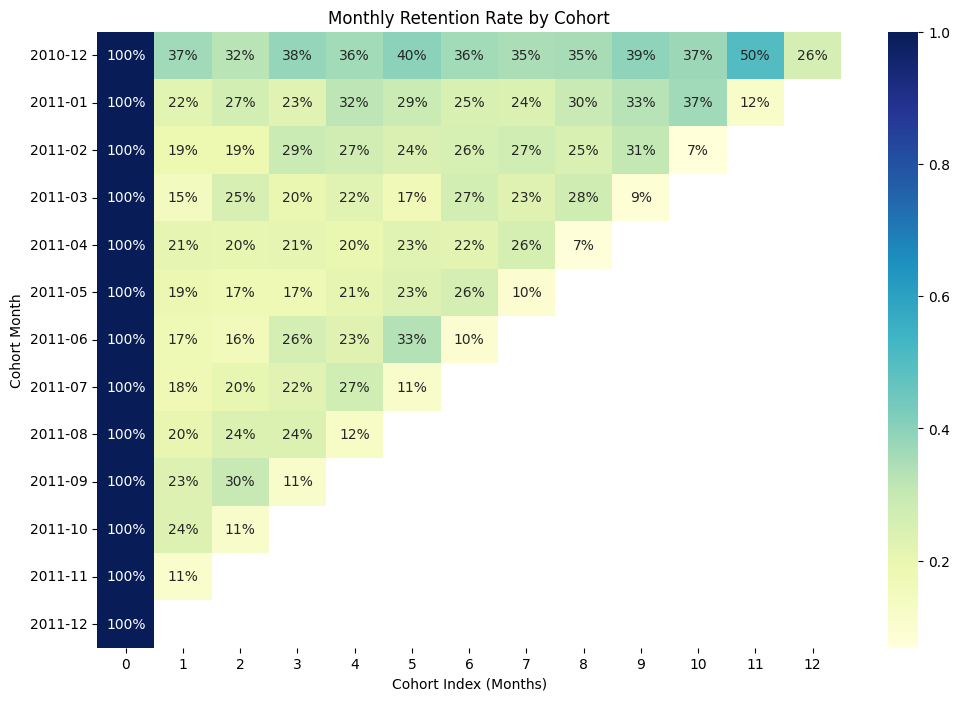

In [8]:
# Retention heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Monthly Retention Rate by Cohort')
plt.xlabel('Cohort Index (Months)')
plt.ylabel('Cohort Month')
plt.show()